# Machine Learning Portfolio 1

In [1]:
#libraries inladen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
## dataframes inladen
SEED = 1337
test_df = pd.read_csv('test_c.csv')
train_df = pd.read_csv('train_c.csv')
display(test_df.head())
display(train_df.head())

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,190,34.0,0.430,43,0
1,324,2,112,75,32,0,35.7,0.148,21,0
2,624,2,108,64,0,0,30.8,0.158,21,0
3,690,8,107,80,0,0,24.6,0.856,34,0
4,473,7,136,90,0,0,29.9,0.210,50,0


In [2]:
##functie defineren om accuracy te pakken
def get_clf_stats(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion


## opdracht 1: EDA

In [3]:
display(test_df.info())
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      154 non-null    int64  
 1   Pregnancies               154 non-null    int64  
 2   Glucose                   154 non-null    int64  
 3   BloodPressure             154 non-null    int64  
 4   SkinThickness             154 non-null    int64  
 5   Insulin                   154 non-null    int64  
 6   BMI                       154 non-null    float64
 7   DiabetesPedigreeFunction  154 non-null    float64
 8   Age                       154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


None

### alle waardes zijn numeriek

In [4]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

train_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


In [5]:
train_df.isna().sum()

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### er zitten geen nans in de data dus het is geschikt voor machine learning

In [6]:
x_cols = train_df.columns[1:9]
x_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

p_id                       -0.085877
Pregnancies                 0.222939
Glucose                     0.475325
BloodPressure               0.082771
SkinThickness               0.078982
Insulin                     0.124408
BMI                         0.272149
DiabetesPedigreeFunction    0.182245
Age                         0.233461
Outcome                     1.000000
Name: Outcome, dtype: float64


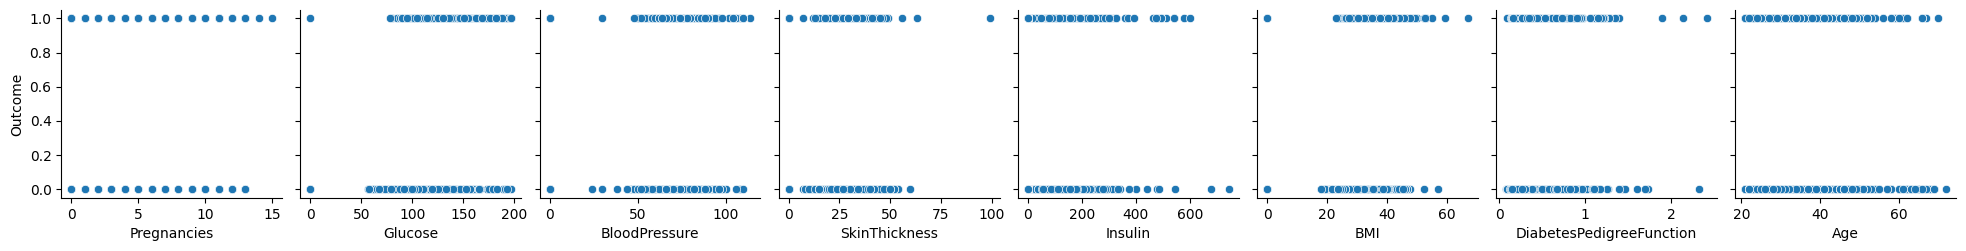

In [7]:
## relaties tussen variabelen laten zien
X = train_df[x_cols]
y = train_df['Outcome']

print(train_df.corr()['Outcome'])
fig = sns.pairplot(
    train_df,
    x_vars=x_cols,
    y_vars='Outcome'
)
plt.show()

## onderzoeken of we moeten standaardiseren en of er outliers in de data  zitten

In [8]:
feature_names = [cname for cname in train_df.loc[:,:'Age'].columns]

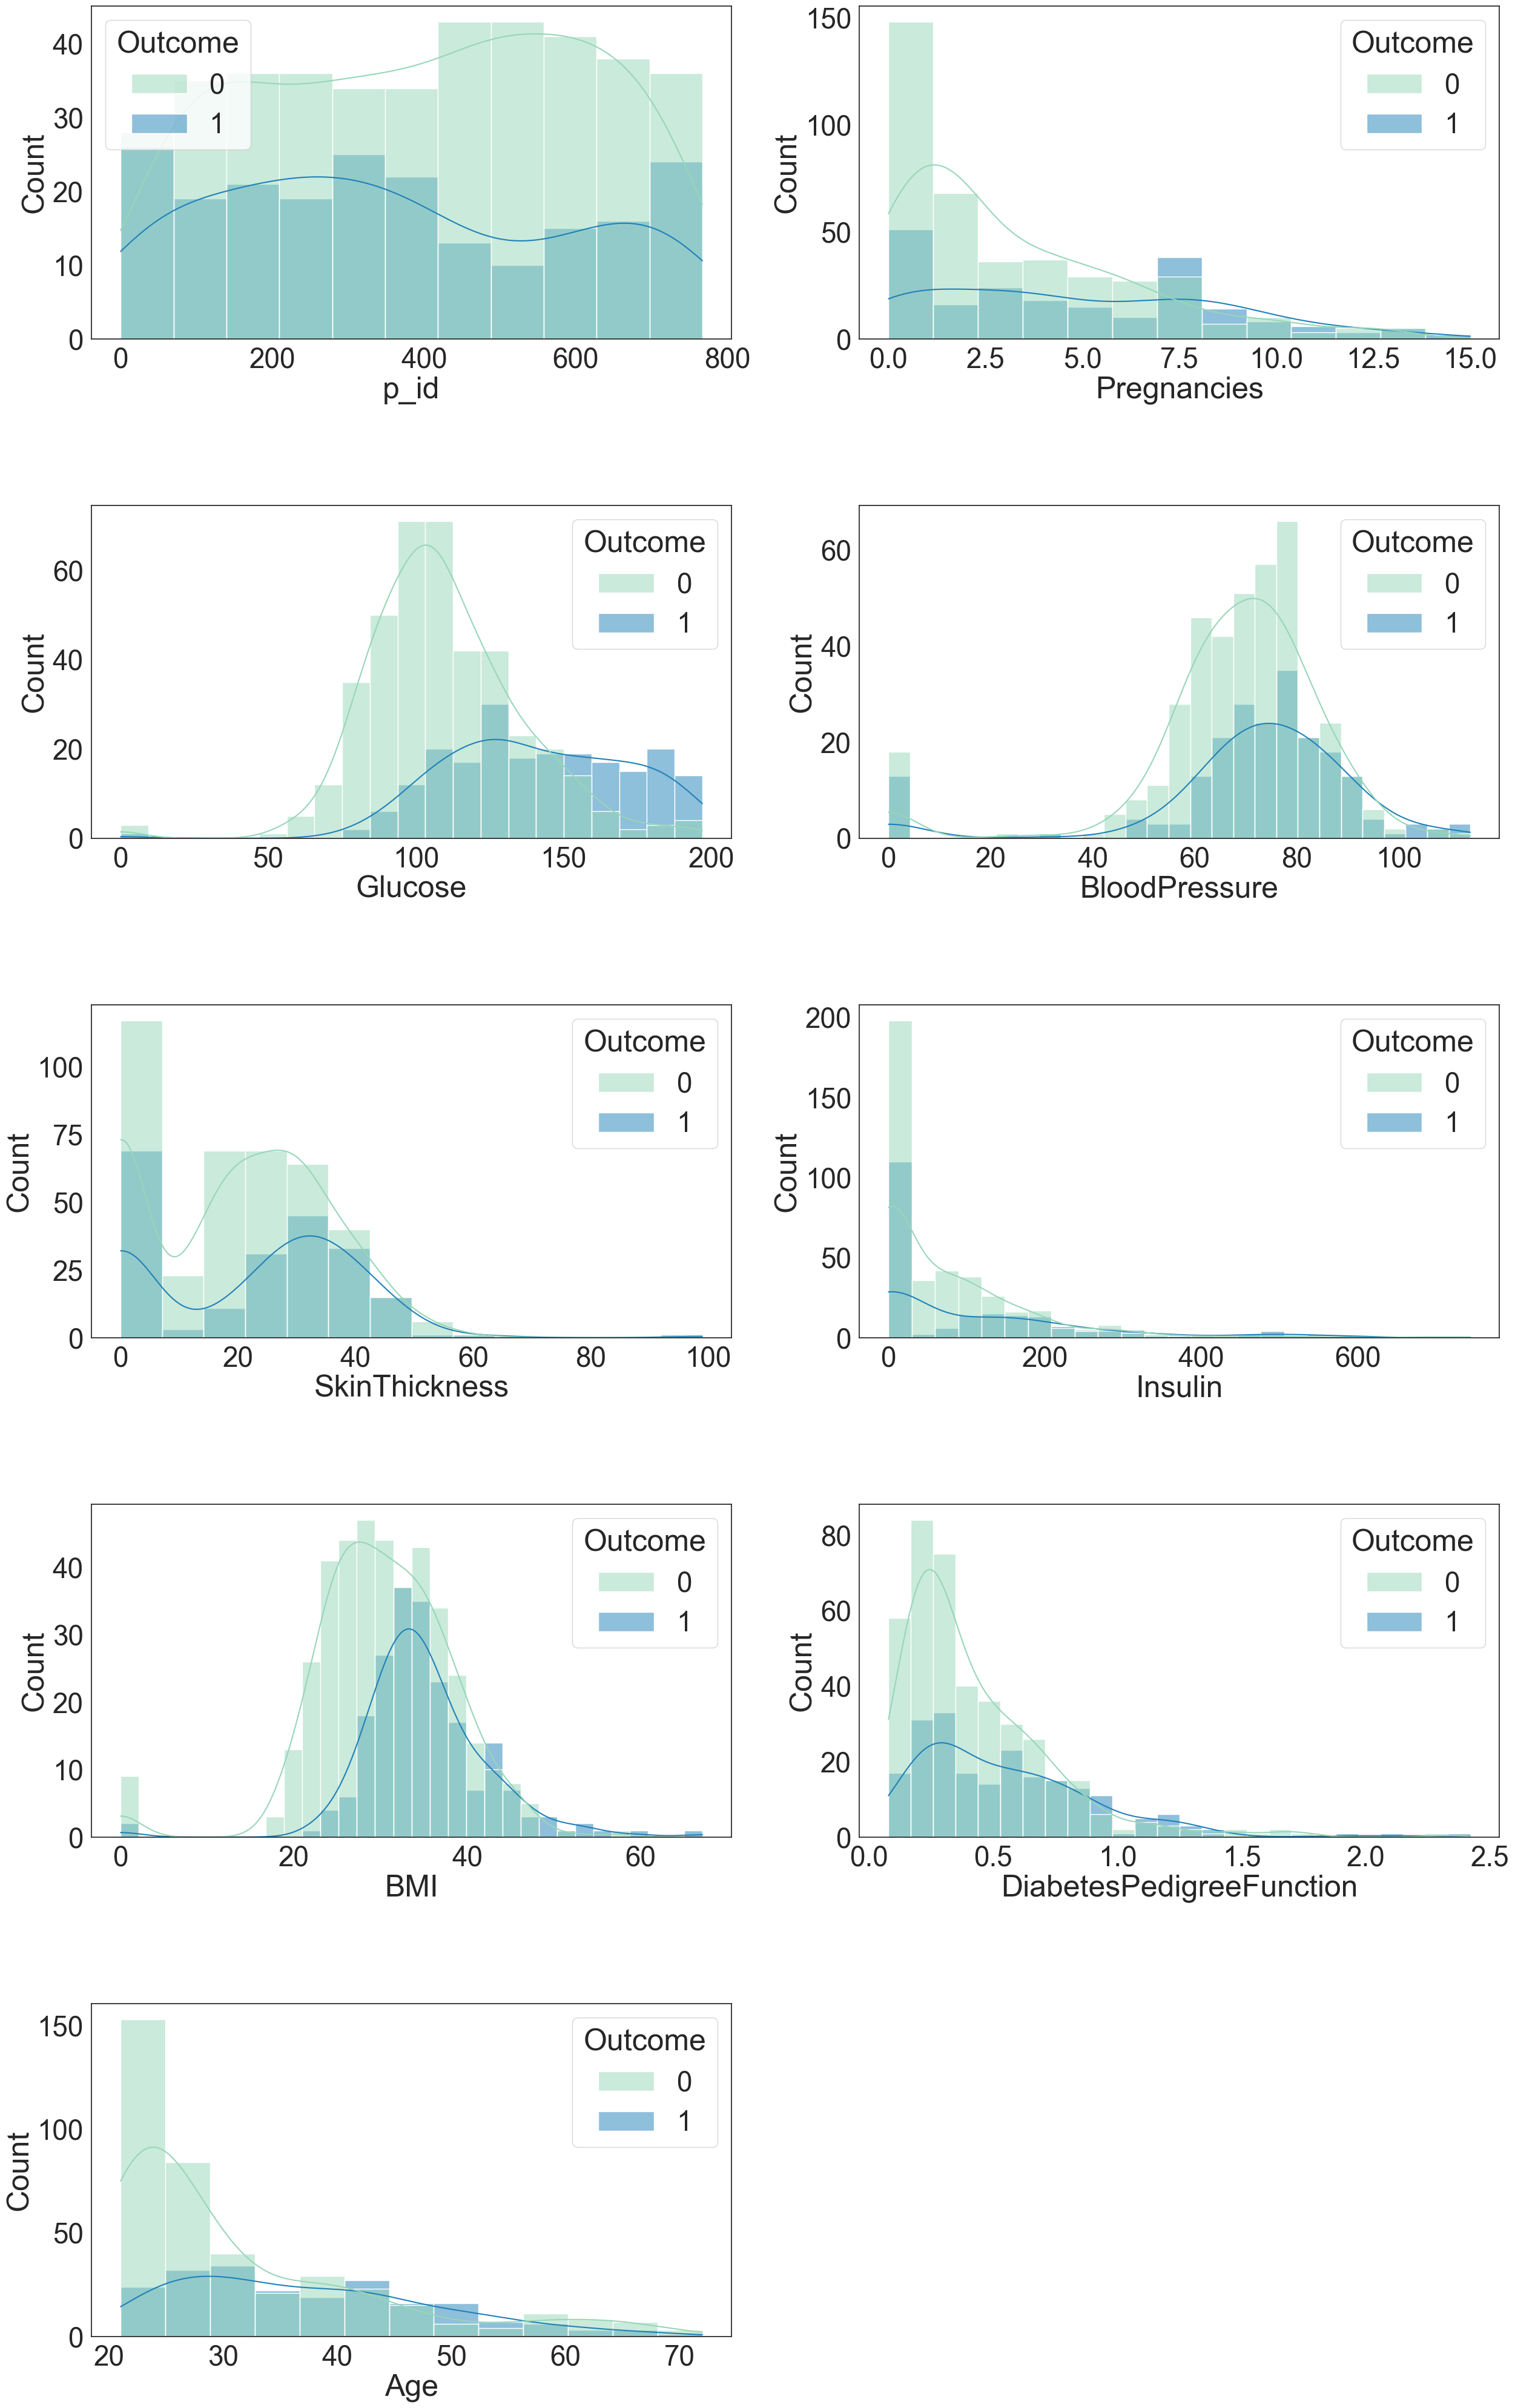

In [9]:
rcParams['figure.figsize'] = 30,50
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

### het is een goed idee om alle nul waardes die niet hier horen te imputen met een knn model en ook outliers verwijderen en imputen

In [10]:
train_df = train_df.drop('Insulin', axis=1)
train_df.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,34.0,0.430,43,0
1,324,2,112,75,32,35.7,0.148,21,0
2,624,2,108,64,0,30.8,0.158,21,0
3,690,8,107,80,0,24.6,0.856,34,0
4,473,7,136,90,0,29.9,0.210,50,0


In [11]:
for x in ['Pregnancies']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['Glucose']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['BloodPressure']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['SkinThickness']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['BMI']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

for x in ['Age']:
    q75,q25 = np.percentile(train_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[x] < min,x] = np.nan
    train_df.loc[train_df[x] > max,x] = np.nan

In [12]:
train_df.isna().sum()

p_id                         0
Pregnancies                  2
Glucose                      4
BloodPressure               40
SkinThickness                1
BMI                         19
DiabetesPedigreeFunction    21
Age                          7
Outcome                      0
dtype: int64

dit model zoekt data dat lijkt op data met de zelfde kenmerken en maakt zo "echte" data aan

In [13]:
## nul waardes uit de desbetreffende features vervangen met nan
train_df[['Glucose','BloodPressure','SkinThickness','BMI']] = train_df[['Glucose',
                                                                                 'BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

In [14]:
## alle nans imputen
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed = imputer.fit_transform(train_df)
train_df_imp = pd.DataFrame(imputed, columns=train_df.columns)
train_df_imp = train_df_imp.drop('p_id', axis=1)
train_df_imp

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,33.000000,34.0,0.430,43.0,0.0
1,2.0,112.0,75.0,32.000000,35.7,0.148,21.0,0.0
2,2.0,108.0,64.0,25.000000,30.8,0.158,21.0,0.0
3,8.0,107.0,80.0,21.000000,24.6,0.856,34.0,0.0
4,7.0,136.0,90.0,35.333333,29.9,0.210,50.0,0.0
...,...,...,...,...,...,...,...,...
609,1.0,125.0,70.0,24.000000,24.3,0.221,25.0,0.0
610,1.0,100.0,66.0,15.000000,23.6,0.666,26.0,0.0
611,2.0,92.0,52.0,25.333333,30.1,0.141,22.0,0.0
612,7.0,114.0,64.0,27.333333,27.4,0.732,34.0,1.0


In [15]:
feature_names = [cname for cname in train_df_imp.loc[:,:'Age'].columns]

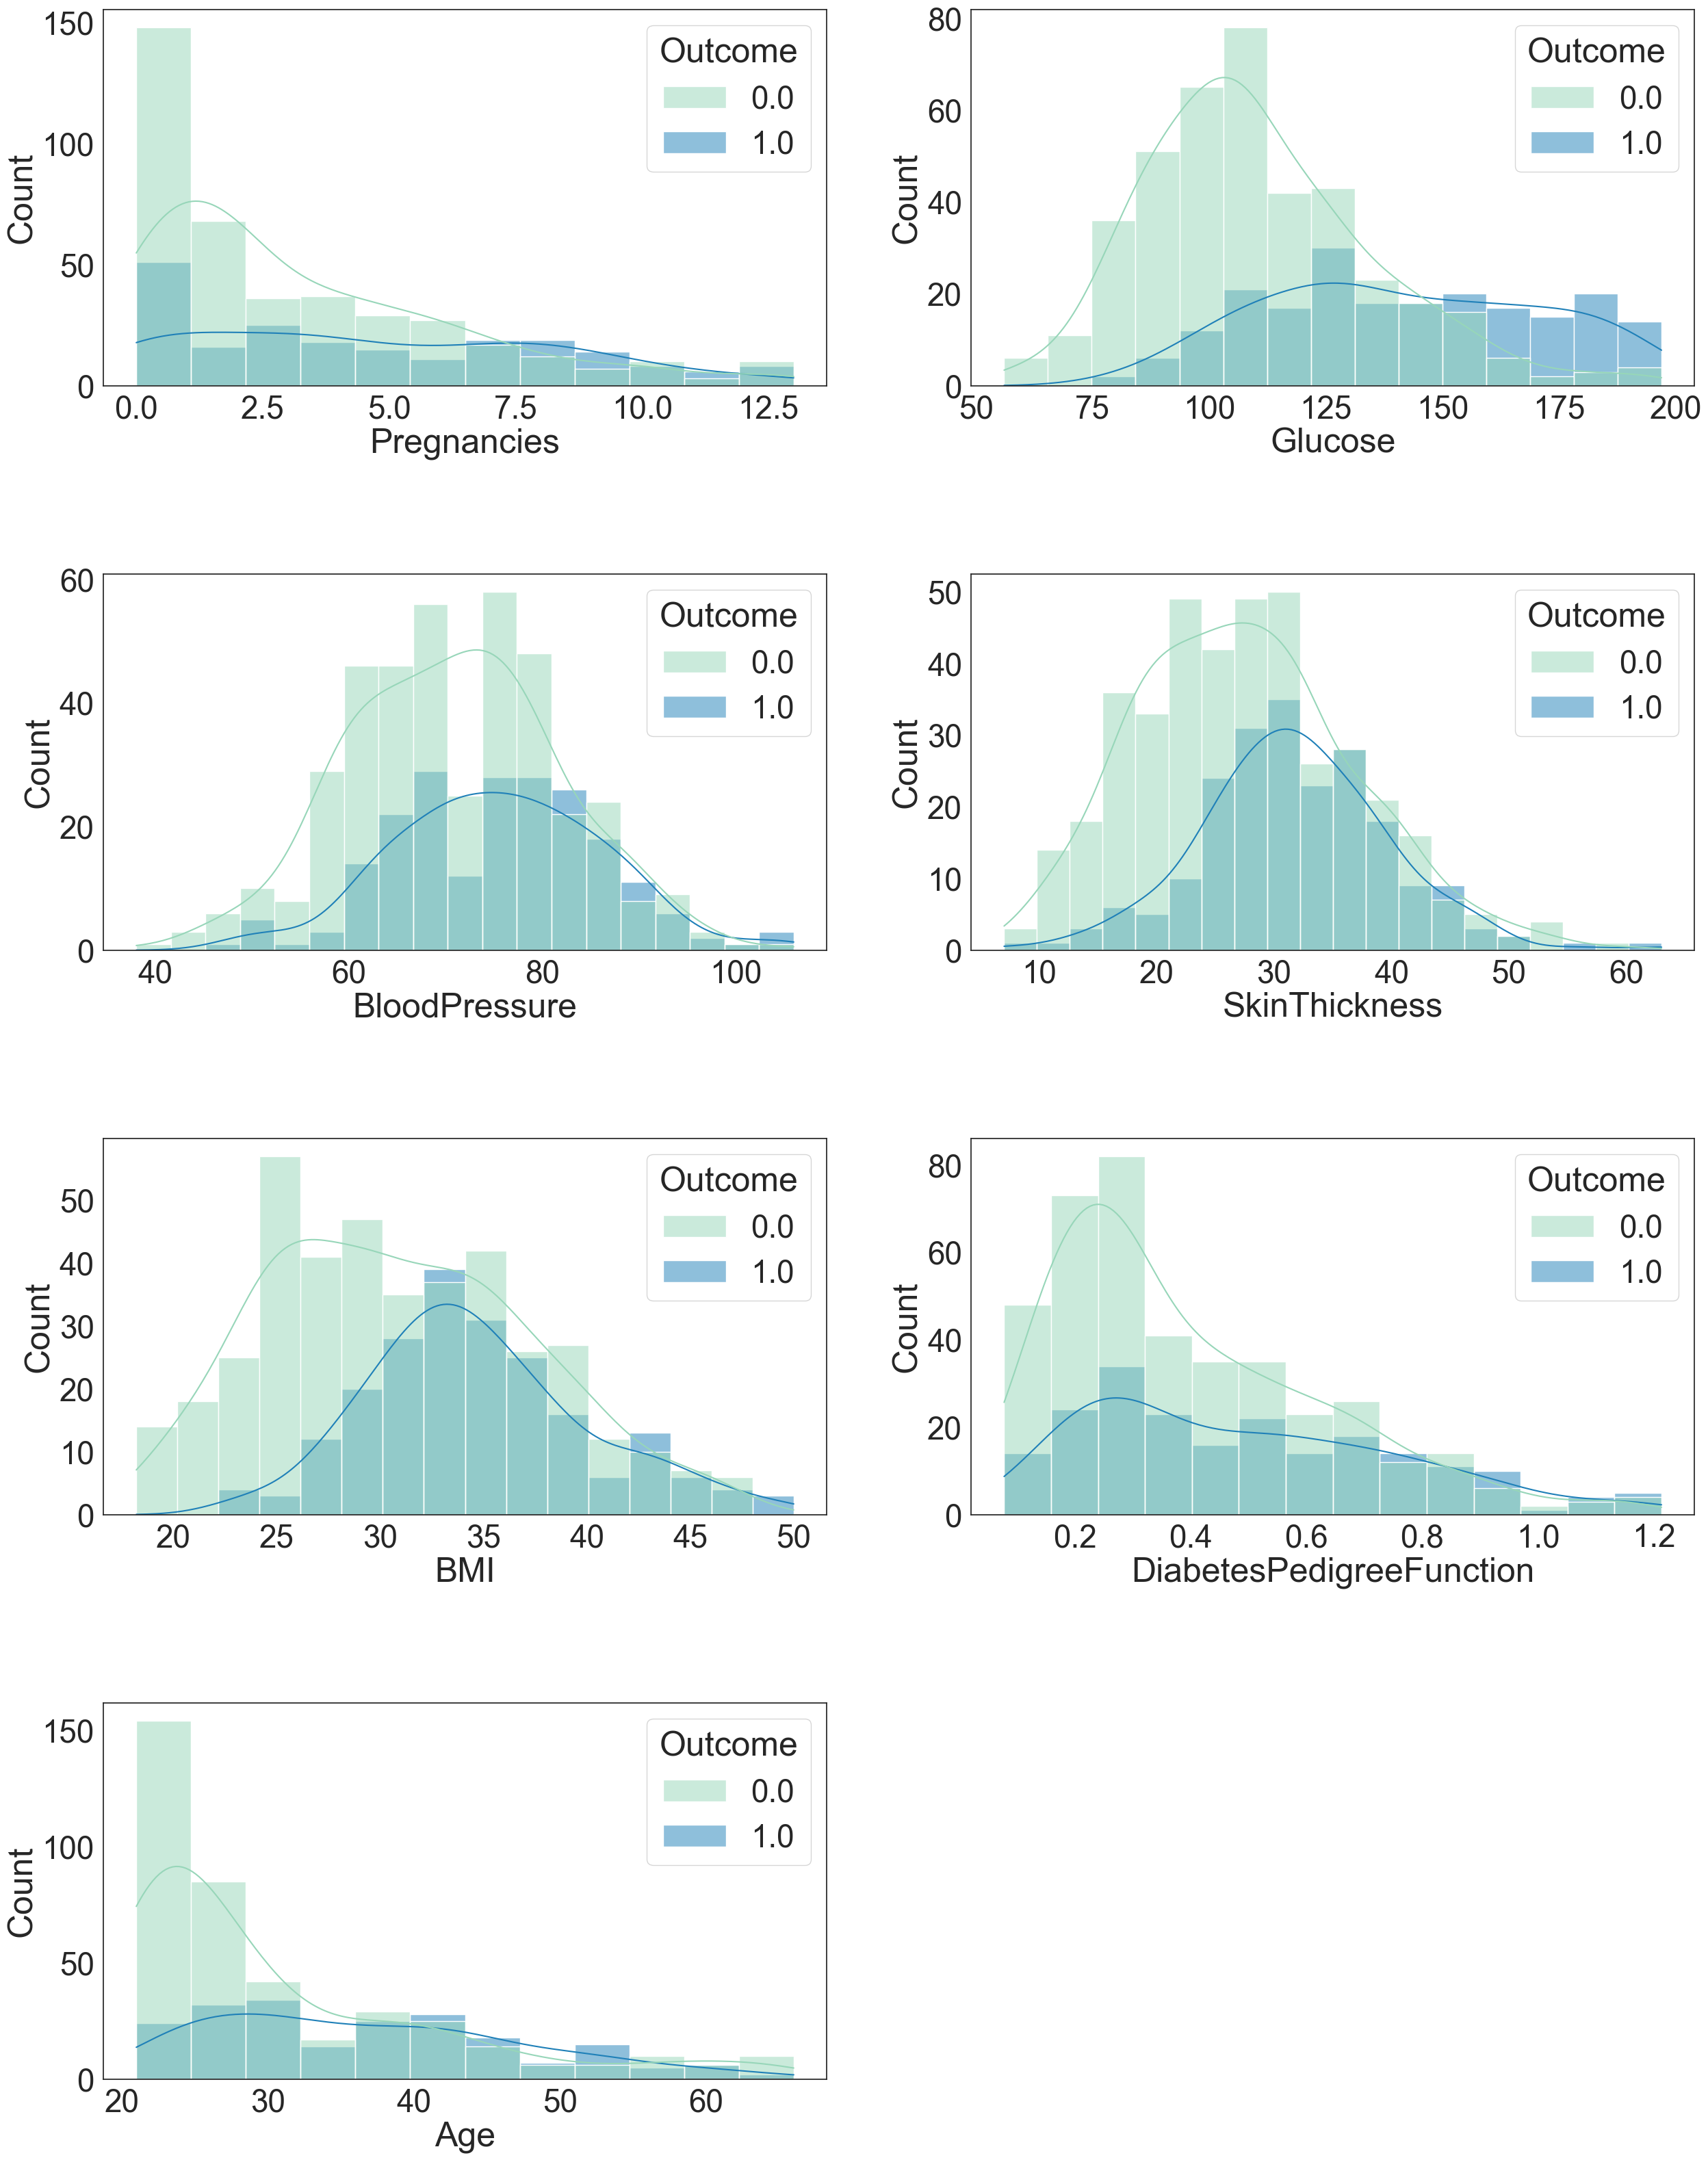

In [16]:
rcParams['figure.figsize'] = 30,50
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train_df_imp, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

## mensen zonder diabetes worden geoverrepresenteerd in de data

dit kunnen we fixen door synthethische datapunten aan te maken

<Axes: >

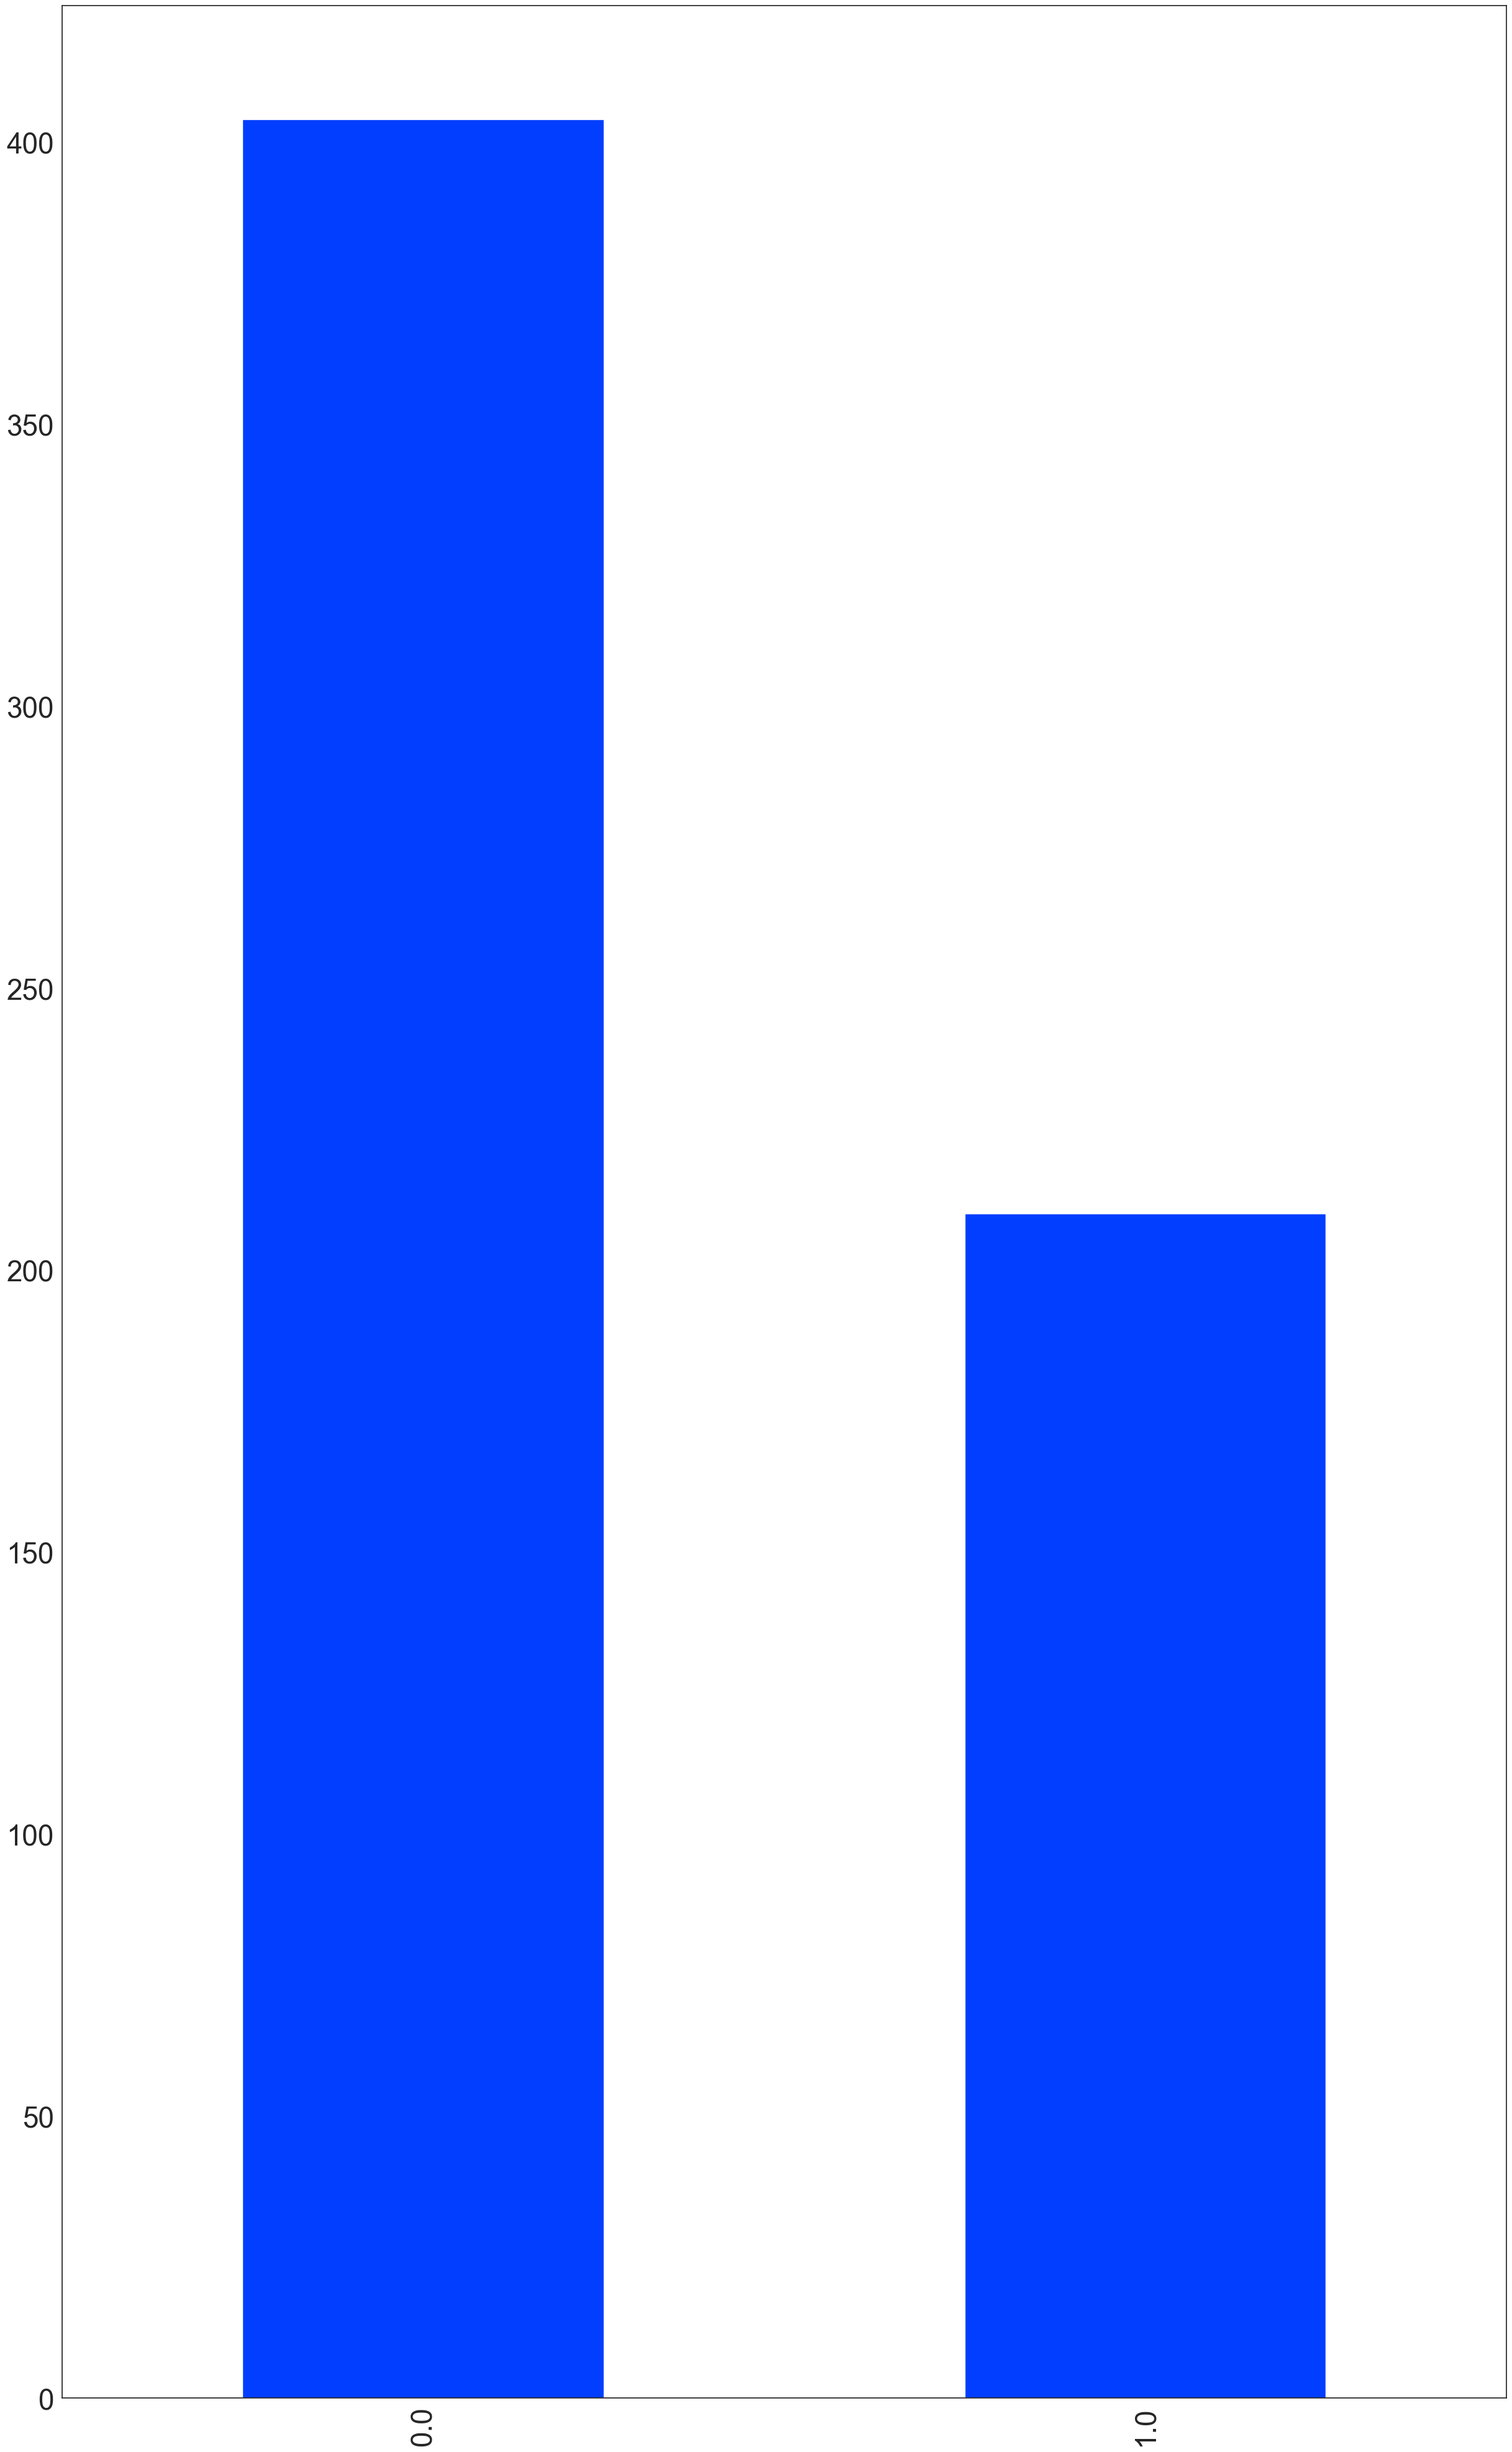

In [17]:
train_df_imp['Outcome'].value_counts().plot(kind='bar')

hier standaardiseren wij de data omdat er veel verschillende meetniveaus zijn

In [18]:
##X en y maken voor models en data klaarmakenx
x_cols = train_df_imp.columns
X = train_df_imp[x_cols]
y = train_df_imp['Outcome']

C:\Users\akers\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<Axes: >

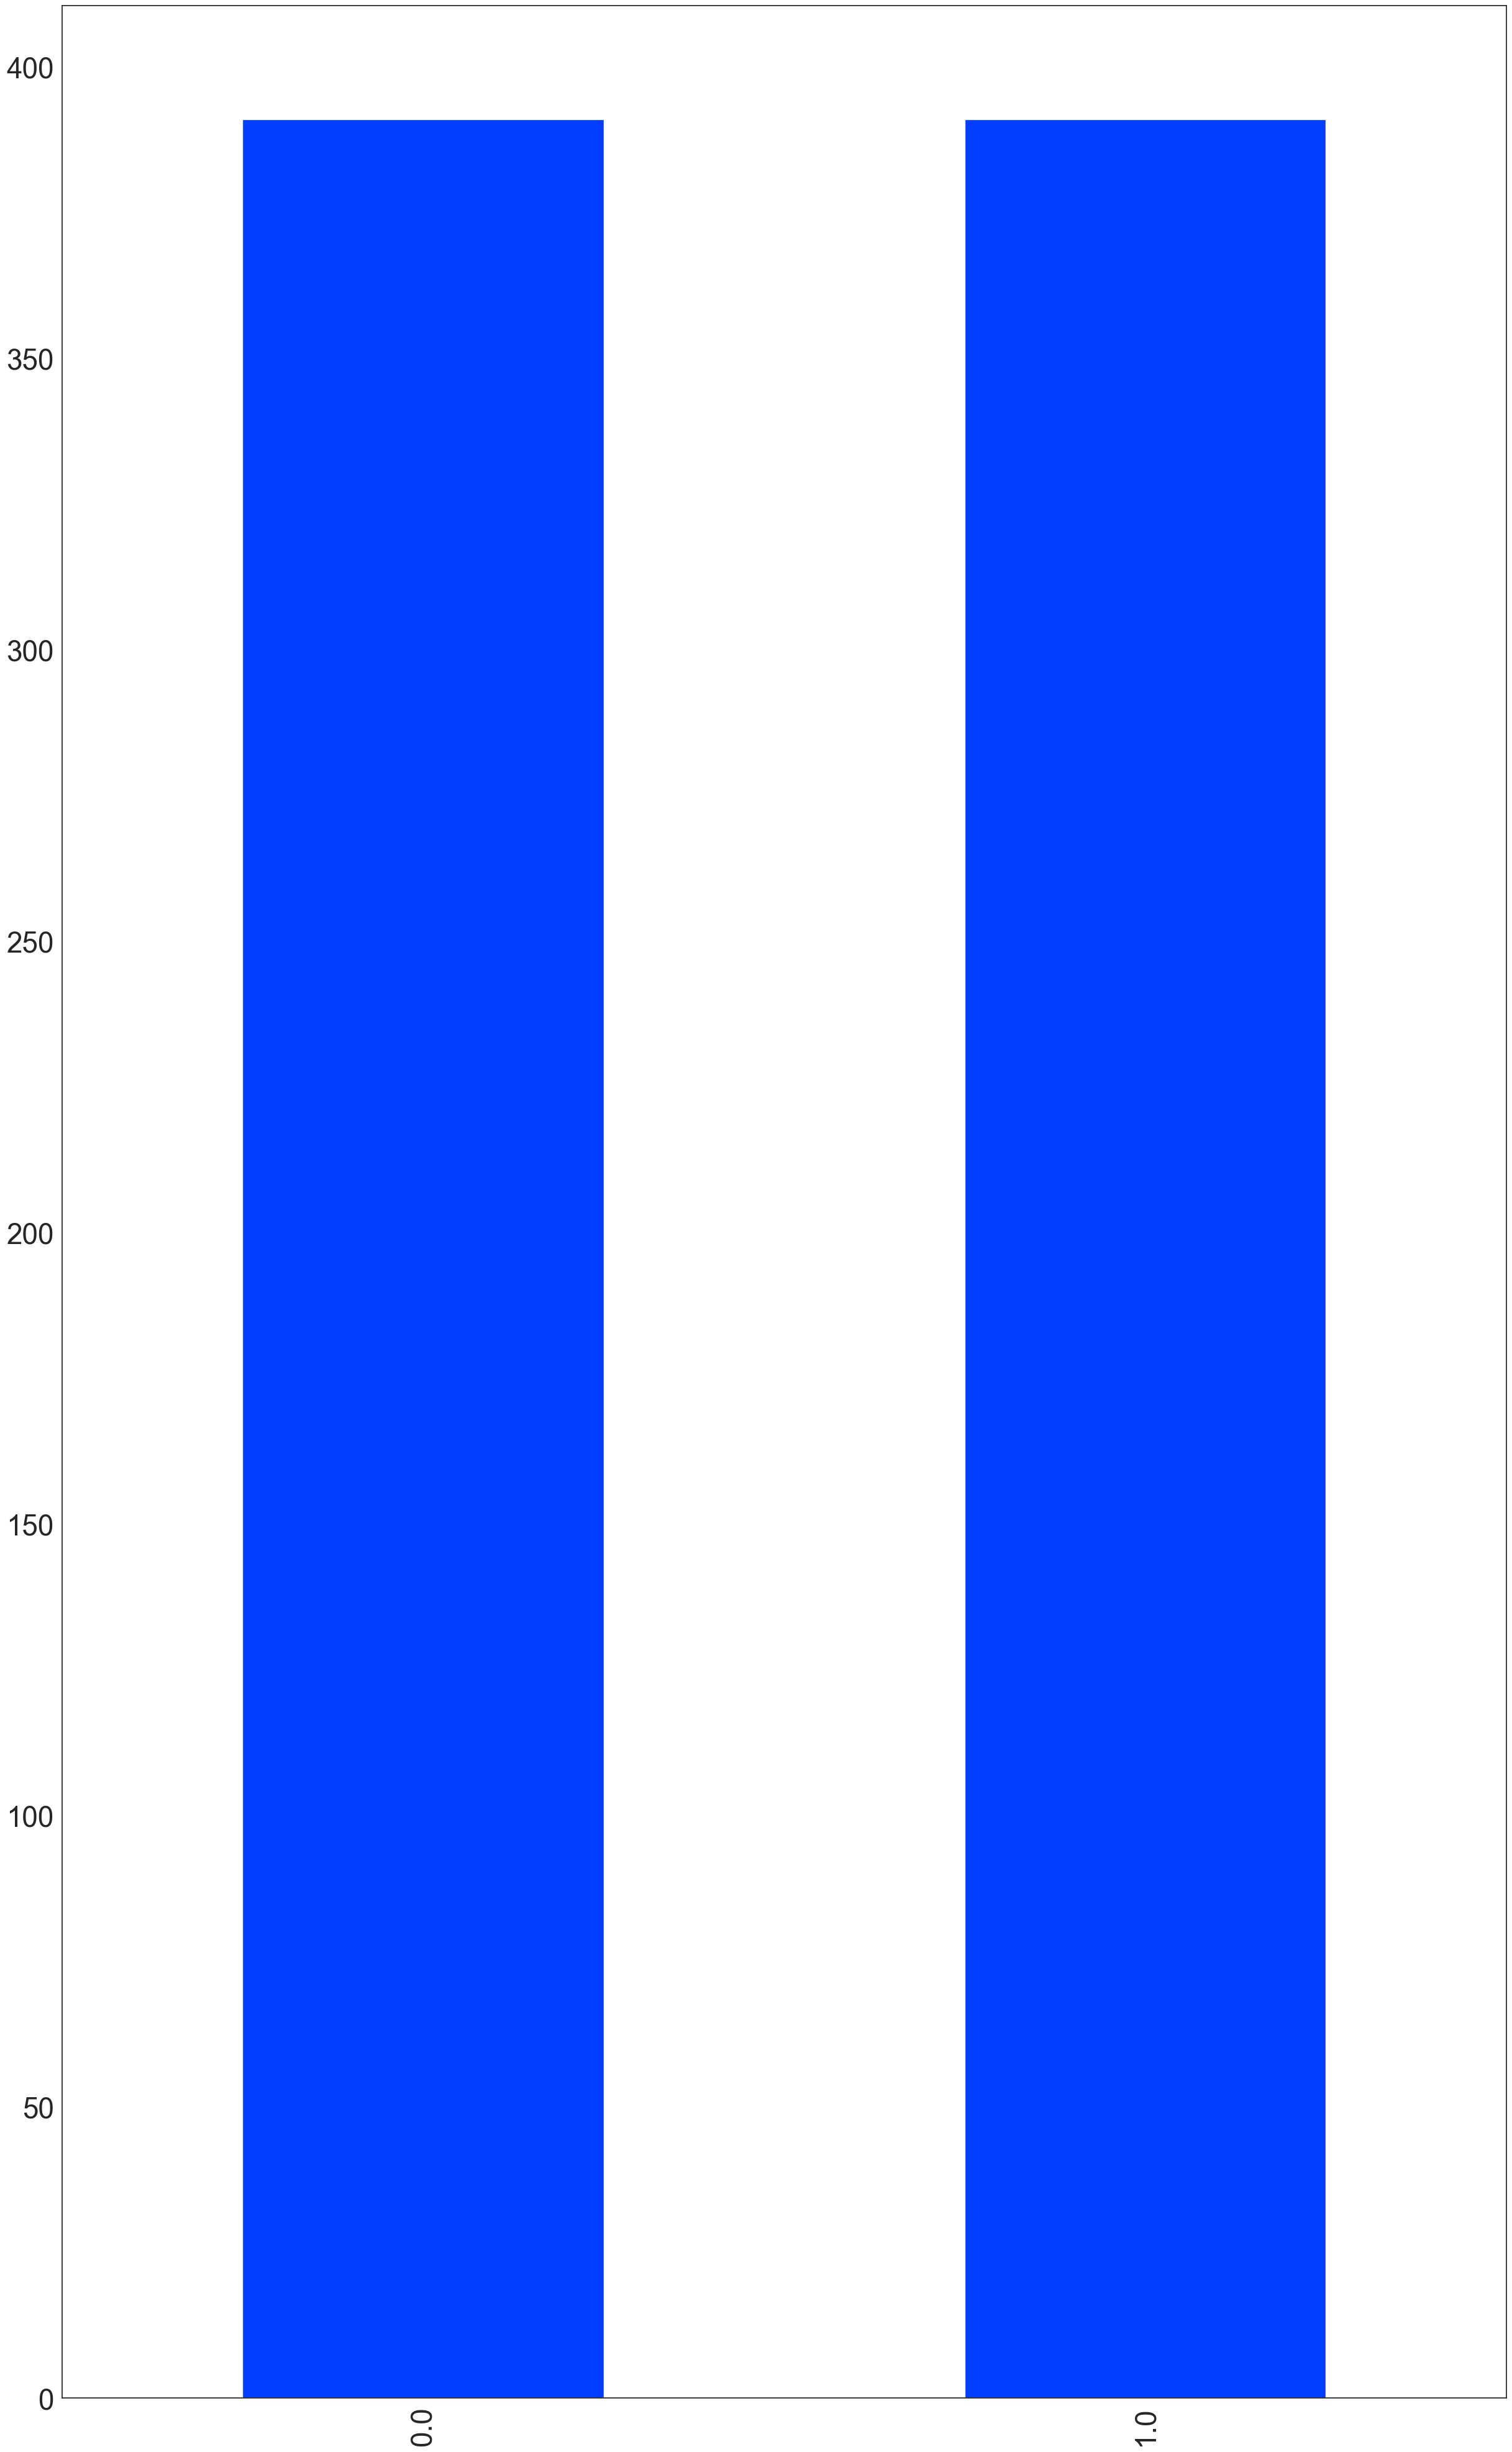

In [19]:
smote = SMOTETomek(sampling_strategy='all', random_state=SEED, n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X, y)

df_model = pd.DataFrame(X_sm, columns=x_cols)
df_model['Outcome'] = y_sm
df_model['Outcome'].value_counts().plot(kind='bar')

In [20]:
df_model.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,33.000000,34.0,0.430,43.0,0.0
1,2.0,112.0,75.0,32.000000,35.7,0.148,21.0,0.0
2,2.0,108.0,64.0,25.000000,30.8,0.158,21.0,0.0
3,8.0,107.0,80.0,21.000000,24.6,0.856,34.0,0.0
4,7.0,136.0,90.0,35.333333,29.9,0.210,50.0,0.0


In [21]:
stand_df = df_model.copy()
stand_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,33.000000,34.0,0.430,43.0,0.0
1,2.0,112.0,75.0,32.000000,35.7,0.148,21.0,0.0
2,2.0,108.0,64.0,25.000000,30.8,0.158,21.0,0.0
3,8.0,107.0,80.0,21.000000,24.6,0.856,34.0,0.0
4,7.0,136.0,90.0,35.333333,29.9,0.210,50.0,0.0


In [22]:
## standaardiseren van de data
x_cols = train_df.columns[1:8]
scale = StandardScaler()
scaled_data = scale.fit_transform(stand_df[x_cols])
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()
stand_df['Pregnancies'] = scaled_data_df[0]
stand_df['Glucose'] = scaled_data_df[1]
stand_df['BloodPressure'] = scaled_data_df[2]
stand_df['SkinThickness'] = scaled_data_df[3]
stand_df['BMI'] = scaled_data_df[4]
stand_df['DiabetesPedigreeFunction'] = scaled_data_df[5]
stand_df['Age'] = scaled_data_df[6]
stand_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.588040,-0.909435,-1.379191,0.412146,0.190860,-0.084929,0.795695,0.0
1,-0.609272,-0.464143,0.152318,0.295800,0.467360,-1.221867,-1.162355,0.0
2,-0.609272,-0.591369,-0.838658,-0.518622,-0.329612,-1.181550,-1.162355,0.0
3,1.186696,-0.623176,0.602762,-0.984006,-1.338025,1.632573,-0.005326,0.0
4,0.887368,0.299215,1.503649,0.683620,-0.475994,-0.971902,1.418711,0.0


mensen met diabetes worden ondergerepresenteerd in de data. We gaan wat synthethische data toevoegen om overfitting te vermijden.

### feature engineering

In [23]:
train_df = df_model

In [24]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

train_df["NewBMI"] = NewBMI

train_df.loc[train_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

train_df.loc[(train_df["BMI"] > 18.5) & (train_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
train_df.loc[(train_df["BMI"] > 24.9) & (train_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
train_df.loc[(train_df["BMI"] > 29.9) & (train_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
train_df.loc[(train_df["BMI"] > 34.9) & (train_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
train_df.loc[train_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [25]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")

train_df["NewGlucose"] = NewGlucose

train_df.loc[train_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

train_df.loc[(train_df["Glucose"] > 70) & (train_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

train_df.loc[(train_df["Glucose"] > 99) & (train_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

train_df.loc[train_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [26]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewGlucose
0,6.0,98.0,58.0,33.000000,34.0,0.430,43.0,0.0,Obesity 1,Normal
1,2.0,112.0,75.0,32.000000,35.7,0.148,21.0,0.0,Obesity 2,Overweight
2,2.0,108.0,64.0,25.000000,30.8,0.158,21.0,0.0,Obesity 1,Overweight
3,8.0,107.0,80.0,21.000000,24.6,0.856,34.0,0.0,Normal,Overweight
4,7.0,136.0,90.0,35.333333,29.9,0.210,50.0,0.0,Overweight,High


In [27]:
train_df = pd.get_dummies(train_df, columns=['NewBMI','NewGlucose'], drop_first=True)

In [28]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,98.0,58.0,33.000000,34.0,0.430,43.0,0.0,1,0,0,0,0,0,1,0
1,2.0,112.0,75.0,32.000000,35.7,0.148,21.0,0.0,0,1,0,0,0,0,0,1
2,2.0,108.0,64.0,25.000000,30.8,0.158,21.0,0.0,1,0,0,0,0,0,0,1
3,8.0,107.0,80.0,21.000000,24.6,0.856,34.0,0.0,0,0,0,0,0,0,0,1
4,7.0,136.0,90.0,35.333333,29.9,0.210,50.0,0.0,0,0,0,1,0,0,0,0


In [29]:
cat_df = train_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight'
                    ,'NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [30]:
concat_df = stand_df.drop('Outcome', axis=1)

In [31]:
X_df = pd.concat([concat_df, cat_df], axis=1)

In [32]:
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,0.588040,-0.909435,-1.379191,0.412146,0.190860,-0.084929,0.795695,1,0,0,0,0,0,1,0
1,-0.609272,-0.464143,0.152318,0.295800,0.467360,-1.221867,-1.162355,0,1,0,0,0,0,0,1
2,-0.609272,-0.591369,-0.838658,-0.518622,-0.329612,-1.181550,-1.162355,1,0,0,0,0,0,0,1
3,1.186696,-0.623176,0.602762,-0.984006,-1.338025,1.632573,-0.005326,0,0,0,0,0,0,0,1
4,0.887368,0.299215,1.503649,0.683620,-0.475994,-0.971902,1.418711,0,0,0,1,0,0,0,0


# opdracht 2: Evaluatie

- De vorm van machine learning die we hier gebruiken is supervised learning. Er worden namelijk test sets gebruikt om een model te trainen
- We hebben met deze opdracht te maken met een classificatie probleem. bij dit soort problemen hebben we een aantal metrics om modellen te evalueren

De belangerijkste metrics zijn deze:
- Accuracy: Deze metric geeft aan hoe veel van de voorspellingen juist zijn
- precision: Deze metric word gebruikt om te meten hoe veel "true positives" je hebt ten opzichte van "false negatives"
- recall: Deze metric meet hoe veel positieve waardes daadwerkelijk positief zijn
- f1-score: Deze metric is het gemiddelde van precision en recall
- de eerder genoemde false positives en negatives zijn uit te beelden in een "confusion matrix" Deze laat zien of je voorspelling juist zijn en hoe de verdeling is tussen goede en slechte voorspellingen
- ook laat deze confusion matrix zien waar je model beter in is

Wij willen een zo hoog mogelijke recall score omdat we "false negatives" willen minimaliseren.

## opdracht 3: modelleren

In [33]:
##x en y maken voor modellen
X = X_df
y = df_model['Outcome']

#### Logistic Regression

"logistic regression model explanation"

Loss is een maatstaf voor het aantal fouten dat je model maakt.<br>
We definiëren een functie om de loss te meten en trainen vervolgens onze modellen om deze loss in onze dataset te minimaliseren.

Loss functie voor regressie is:

$$ Mean\space{}Squared\space{}Error = \frac{\Sigma(y_{true}) - y_{pred})^{2}}{n}$$<br>
$$ Root\space{}Mean\space{}Squared\space{}Error = \sqrt{\frac{\Sigma(y_{true}) - y_{pred})^{2}}{n}}$$<br>
$$ Mean\space{}Absolute\space{}Error = \frac{\Sigma|(y_{true}) - y_{pred})|}{n}$$

"above explanation"

Loss functie voor classificatie is:

$$Log\space{}Loss = -\frac{1}{N} \sum\limits_{i=1}^{N} [y_{true} log(y_{pred}) + (1 - y_{true}) log(1 - y_{pred})$$<br>
- y_true is 1 of 0 (positief of negatief)
- y_pred is een kans tussen 0 en 1
- Loss functie - "cross-entropy loss" of "logistic loss"

"above explanation"

"gradient descent"
"reken voorbeeld"
"relevante formule toepassen"

"vormen van regularisatie die van toepassing zijn op dit model"
"aan de hand van wiskunde formules hoe elk vorm werkt en het effect erop"
"hoe verhoudt regularisatie zich ten opzichte van overfitting?"

In [34]:
# logreg model maken en alle params voor tuning
logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [35]:
## tunen van het model en best paramaters printen 
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=SEED)
grid_search = GridSearchCV(estimator = logreg, param_grid = grid, n_jobs = -1, cv=cv, scoring ='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


beste parameters zijn dus: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [36]:
## tuned logreg model met de beste parameters
logreg_tuned = LogisticRegression(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [37]:
cross_val_score(logreg_tuned, X, y, cv = 10).mean()

0.7686303148328465

#### Decision Tree

Decision Tree start met een root node en split de data continu in subsets afhankelijk van de features. De nodes tussen het begin en eind zijn de internal nodes, hetzelfde hoe de root node is verdeeld in twee nodes, so ook voor de internal nodes afhankelijk van de features. En aan het eind komt de leaf nodes. Dat is een Decision Tree. Dus wanneer er predictions wordt gemaakt, loopt het afhankelijk van de features vanaf de root node door totdat het bij een leaf node komt.<br>
De keuze wordt gemaakt door het vergelijken van de feature value van de input data met de drempelwaarde, dan loopt het naar de volgende internal node or leaf node.

In [38]:
# decision tree model maken en alle params voor tuning
dt = DecisionTreeClassifier(random_state=SEED)
criterions = ['gini', 'entropy', 'log_loss']
splitters = ['best', 'random']
depths = [1, 5, 10, 100, None]
samples = [2, 5, 10]

In [39]:
## tunen van het model en best paramaters printen 
grid = dict(criterion = criterions, splitter = splitters, max_depth = depths, min_samples_split = samples)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator= dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'random'}


beste parameters zijn dus: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}

In [40]:
dt_tuned = DecisionTreeClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [41]:
cross_val_score(dt_tuned, X, y, cv=100).mean()

0.7914285714285714

#### Random Forest

Random Forest maakt een aantal Decision Trees en gebruikt het gemiddelde om de voorspelling nauwkeuriger te hebben. Dit verbetert ook de performance, dus het is beter dan om met een Decision Tree alleen te werken.

In [42]:
# random forrest model maken en alle params voor tuning
# we kunnen hier bijna dezelfde params gebruiken als decision tree
rf = RandomForestClassifier(random_state=SEED)
criterions = ['gini', 'entropy', 'log_loss']
max_fts = ['sqrt', 'log2', None]
depths = [1, 5, 10, 100, None]
samples = [2, 5, 10]

In [43]:
## tunen van het model en best paramaters printen 
grid = dict(criterion = criterions, max_depth = depths, min_samples_split = samples, max_features = max_fts)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator= rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2}


beste params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2}

In [44]:
rf_tuned = RandomForestClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [45]:
cross_val_score(rf_tuned, X, y, cv=100).mean()

0.8339285714285714

#### Gradient boosting

Gradient Boosting kan met verschillende modellen werken. Neem Decision Tree als voorbeeld. Gradient Boosting start met 1 Tree (dit is het huidige model), nadien wordt de errors, die resten wordt genoemd, berekend. De nieuwe Tree (weak learner) zal deze errors voorspellen om nieuwe patterns te vinden. De voorspelling van de weak learner wordt dan toegevoegd aan het huidige model, daardoor wordt de voorspelling verbeterd. De bijdrage van elk weak learner wordt gewogen door middel van zijn prestatie. De uiteindelijke voorspelling wordt gemaakt door de voorspellingen van alle weak learners samen te voegen, elk gewogen door zijn prestatie in het verminderen van de residuen.

In [46]:
gb = GradientBoostingClassifier(random_state=SEED)
loss_func = ['log_loss', 'exponential']
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
estimators = [1, 2, 5, 10, 100]
crit = ['friedman_mse', 'squared_error']
depths = [1, 5, 10, 100, None]

In [47]:
grid = dict(loss = loss_func, learning_rate = rate, n_estimators = estimators,
             criterion = crit,
            max_depth = depths)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator=gb, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 10, 'n_estimators': 100}


beste params {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 0.2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'subsample': 0.7}

In [48]:
gb_tuned = GradientBoostingClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [49]:
cross_val_score(gb_tuned, X, y, cv=10).mean()

0.8338364167478091

#### ADA Boosting

Alle training examples krijgen hetzelfde gewicht, daarna worden ze iterated. Bij elke iteratie wordt het gewicht aangepast door de vorige voorspellingen van de weak learners. Verder wordt er getraind op de training data met het huidig gewicht. De weak learner let op de examples die verkeerd geclassificeerd zijn, omdat zij een hogere gewicht krijgen. Nadat de weak learner getraind is, berekent ADA Boost een gewicht op basis van zijn nauwkeurigheid.

In [50]:
ADA = AdaBoostClassifier(random_state=SEED)
estimators = [1, 2, 5, 10, 100]
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
algo = ['SAMME', 'SAMME.R']

In [51]:
grid = dict(n_estimators = estimators, learning_rate=rate, algorithm=algo)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator=ADA, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


beste params: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

In [52]:
ADA_tuned = AdaBoostClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [53]:
cross_val_score(ADA_tuned, X, y, cv=10).mean()

0.7891431353456669

#### SVM

In [54]:
SVM = SVC(random_state=SEED)
c_values = [100, 10, 1.0, 0.1, 0.01]
kernels = ['poly', 'rbf', 'sigmoid']
gammas = ['scale', 'auto']
decision_function = ['ovo', 'ovr']

In [55]:
grid = dict(C=c_values, kernel=kernels, gamma=gammas,
            decision_function_shape=decision_function)
grid_search = GridSearchCV(estimator=SVM, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


beste params: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'sigmoid'}

In [56]:
SVM_tuned = SVC(**grid_result.best_params_, random_state=SEED, probability=True)

In [57]:
cross_val_score(SVM_tuned, X, y, cv=10).mean()

0.8249432002596558

#### Ensemble

In [58]:
eclf_hard = VotingClassifier(estimators=[('rf', rf_tuned),
                                         ('gb', gb_tuned),
                                         ('svm', SVM_tuned)], voting='hard').fit(X,y)
eclf_soft = VotingClassifier(estimators=[('rf', rf_tuned),
                                         ('gb', gb_tuned),
                                         ('svm', SVM_tuned)], voting='soft').fit(X,y)

In [59]:
hard_score = cross_val_score(eclf_hard, X, y, cv=10).mean()
soft_score = cross_val_score(eclf_soft, X, y, cv=10).mean()
print('Hard score: ', hard_score)
print('Soft score: ', soft_score)

Hard score:  0.8300064913988965
Soft score:  0.8363842908146705


#### model naar keuze:  Gaussian Naive Bayes

er zijn geen parameters om te tunen bij dit model.

In [60]:
gnm = GaussianNB().fit(X,y)

In [61]:
cross_val_score(gnm, X, y, cv=10).mean()

0.515352158390133

### prediction

In [62]:
for x in ['Pregnancies']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['Glucose']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['BloodPressure']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['SkinThickness']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['BMI']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

for x in ['Age']:
    q75,q25 = np.percentile(test_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    test_df.loc[test_df[x] < min,x] = np.nan
    test_df.loc[test_df[x] > max,x] = np.nan

In [63]:
test_df = test_df.drop('Insulin', axis=1)
test_df.isna().sum()

p_id                        0
Pregnancies                 2
Glucose                     1
BloodPressure               6
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    8
Age                         2
dtype: int64

In [64]:
## nul waardes uit de desbetreffende features vervangen met nan
test_df[['Glucose','BloodPressure','SkinThickness','BMI']] = test_df[['Glucose',
                                                                                 'BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

In [65]:
## alle nans imputen
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed = imputer.fit_transform(test_df)
test_df_imp = pd.DataFrame(imputed, columns=test_df.columns)
test_df_imp.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,1.0,1.0,85.0,66.0,29.0,26.6,0.351000,31.0
1,4.0,0.0,137.0,40.0,35.0,43.1,0.752333,33.0
2,13.0,1.0,189.0,60.0,23.0,30.1,0.398000,59.0
3,14.0,5.0,166.0,72.0,19.0,25.8,0.587000,51.0
4,20.0,3.0,126.0,88.0,41.0,39.3,0.704000,27.0


In [66]:
## standaardiseren van de data
scale = StandardScaler()
scaled_data = scale.fit_transform(test_df_imp[x_cols])
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()
test_df_imp['Pregnancies'] = scaled_data_df[0]
test_df_imp['Glucose'] = scaled_data_df[1]
test_df_imp['BloodPressure'] = scaled_data_df[2]
test_df_imp['SkinThickness'] = scaled_data_df[3]
test_df_imp['BMI'] = scaled_data_df[4]
test_df_imp['DiabetesPedigreeFunction'] = scaled_data_df[5]
test_df_imp['Age'] = scaled_data_df[6]
test_df_imp.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,1.0,-0.924341,-1.251669,-0.459439,-0.031749,-0.832356,-0.347896,-0.167921
1,4.0,-1.250579,0.452695,-2.734288,0.640067,1.601216,1.411953,0.023870
2,13.0,-0.924341,2.157060,-0.984404,-0.703565,-0.316144,-0.141801,2.517148
3,14.0,0.380611,1.403206,0.065526,-1.151442,-0.950348,0.686965,1.749986
4,20.0,-0.271865,0.092157,1.465433,1.311883,1.040757,1.200011,-0.551502


In [67]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

test_df["NewBMI"] = NewBMI

test_df.loc[test_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

test_df.loc[(test_df["BMI"] > 18.5) & (test_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
test_df.loc[(test_df["BMI"] > 24.9) & (test_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
test_df.loc[(test_df["BMI"] > 29.9) & (test_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
test_df.loc[(test_df["BMI"] > 34.9) & (test_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
test_df.loc[test_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [68]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")

test_df["NewGlucose"] = NewGlucose

test_df.loc[test_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

test_df.loc[(test_df["Glucose"] > 70) & (test_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

test_df.loc[(test_df["Glucose"] > 99) & (test_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

test_df.loc[test_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [69]:
test_df = pd.get_dummies(test_df, columns =["NewBMI", "NewGlucose"], drop_first = True)

In [70]:
cat_df_test = test_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [71]:
p_id = test_df['p_id']
test_df_imp = test_df_imp.drop('p_id', axis=1)

In [72]:
pred_df = pd.concat([test_df_imp, cat_df_test], axis=1)
pred_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,-0.924341,-1.251669,-0.459439,-0.031749,-0.832356,-0.347896,-0.167921,0,0,0,1,0,0,1,0
1,-1.250579,0.452695,-2.734288,0.640067,1.601216,1.411953,0.023870,0,0,1,0,0,0,0,0
2,-0.924341,2.157060,-0.984404,-0.703565,-0.316144,-0.141801,2.517148,1,0,0,0,0,0,0,0
3,0.380611,1.403206,0.065526,-1.151442,-0.950348,0.686965,1.749986,0,0,0,1,0,0,0,0
4,-0.271865,0.092157,1.465433,1.311883,1.040757,1.200011,-0.551502,0,1,0,0,0,0,0,1


In [73]:
#prediction maken
pred = gb_tuned.predict(pred_df)

In [74]:
pred_df = pd.DataFrame(pred)
p_id_df = pd.DataFrame(p_id)
ans = pd.concat([p_id_df, pred_df], axis=1)
ans = ans.rename(columns = {0: 'p_id', 0: 'Outcome'})
ans.to_csv('Submission.csv', index = False)

## Bevindingen

## Conclusie en aanbevelingen